VI Auswertung mit Python
===

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy import exp, sqrt, log
from scipy.optimize import curve_fit
from scipy.stats import chi2

1 Zerfall der Silberisotope
--

In [2]:
# Untergrundmessung
unterg = np.loadtxt('data/252/untergrundAJ.dat', usecols = [1])

mean_unterg = 4 * np.mean(unterg)
sig_mean_unterg = np.std(4 * unterg) / np.sqrt(len(unterg))

print('Mittelwert: ' ,np.round(mean_unterg,1)) # counts pro 10 Sekunden
print('Fehler des Mittelwerts: ', np.round(sig_mean_unterg,1))

Mittelwert:  13.4
Fehler des Mittelwerts:  1.1


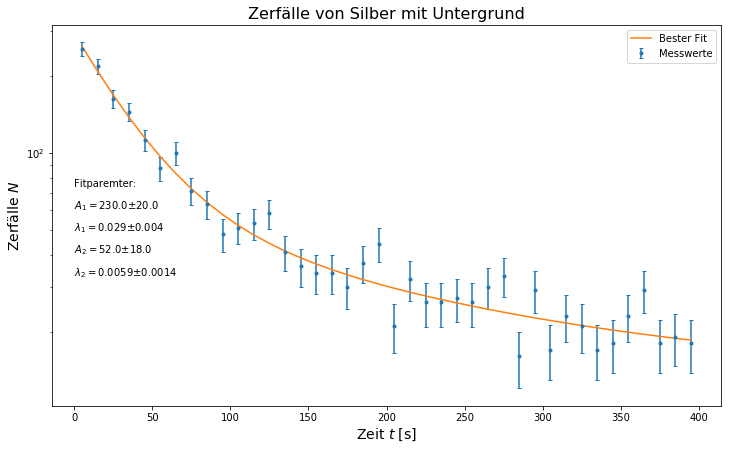

In [3]:
# Bestimmung der Zerfallskonstante
n1 = np.loadtxt('data/252/SilberAJ1.dat', usecols = [1])
n2 = np.loadtxt('data/252/SilberAJ2.dat', usecols = [1])
n3 = np.loadtxt('data/252/SilberAJ3.dat', usecols = [1])
n4 = np.loadtxt('data/252/SilberAJ4.dat', usecols = [1])
N = n1 + n2 + n3 + n4
sig_N = np.sqrt(N)
t = np.arange(5, 405, 10)

# Fit
y0 = mean_unterg
def expo(x, A1, l1, A2, l2):
    return A1 * exp(-l1 * x) + A2 * exp(-l2 * x) + y0

popt, pcov = curve_fit(expo, t, N, sigma = sig_N, p0 = [250, 0.2, 50, 0.001])

# Fitparameter
A_1 = popt[0]
sig_A_1 = pcov[0,0]
l_1 = popt[1]
sig_l_1 = pcov[1,1]
A_2 = popt[2]
sig_A_2 = pcov[2,2]
l_2 = popt[3]
sig_l_2 = pcov[3,3]

# Plot
plt.figure(figsize = (12,7))
# Messungen
plt.errorbar(t, N, yerr = sig_N, fmt = '.', capsize = 2, label = 'Messwerte')
plt.xlabel('Zeit $t$ [s]', size = 14)
plt.ylabel('Zerfälle $N$', size = 14)
plt.title('Zerfälle von Silber mit Untergrund', size = 16)
plt.yscale('log')

# Fit
plt.plot(t, expo(t, *popt), label = 'Bester Fit') 
plt.text(0, exp(4.3), 'Fitparemter:')
plt.text(0, exp(4.1), '$A_1 = $' + str(np.round(A_1,-1)) + '$\pm$' 
         + str(np.round(sqrt(sig_A_1),-1)))
plt.text(0, exp(3.9), '$\\lambda_1 = $' + str(np.round(l_1, 3)) + '$\pm$' 
         + str(np.round(sqrt(sig_l_1),3)))
plt.text(0, exp(3.7), '$A_2 = $' + str(np.round(A_2,0)) + '$\pm$' 
         + str(np.round(sqrt(sig_A_2),0)))
plt.text(0, exp(3.5), '$\\lambda_2 = $' + str(np.round(l_2,4)) + '$\pm$' 
         + str(np.round(sqrt(sig_l_2),4)))

plt.legend(loc = 'best')
plt.savefig('images/252/V252Diagramm1.png')
plt.show()

In [4]:
# Güte des Fits
chi2_= np.sum((expo(t, *popt) - N) ** 2 / sig_N ** 2) 
dof = len(N) - 4 #dof:degrees of freedom, Freiheitsgrad 
chi2_red = chi2_/dof

print("chi2 =", chi2_)
print("chi2_red =",chi2_red)

prob = np.round(1 - chi2.cdf(chi2_,dof),2) * 100 
print("Wahrscheinlichkeit =", prob, "%")

chi2 = 35.06843196724907
chi2_red = 0.974123110201363
Wahrscheinlichkeit = 51.0 %


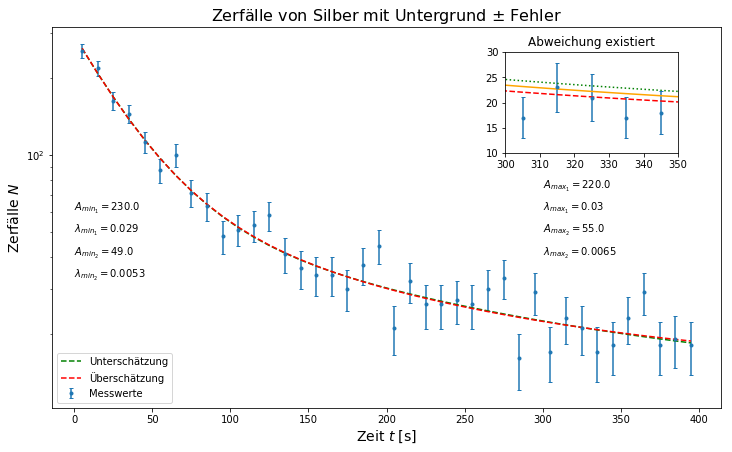

In [5]:
# Fit unter Berücksichtigung des Untergrund-Fehlers

# Plot
plt.figure(figsize = (12,7))
# Messungen
plt.errorbar(t, N, yerr = sig_N, fmt = '.', capsize = 2, label = 'Messwerte')
plt.xlabel('Zeit $t$ [s]', size = 14)
plt.ylabel('Zerfälle $N$', size = 14)
plt.title('Zerfälle von Silber mit Untergrund $\pm$ Fehler', size = 16)
plt.yscale('log')

# Fit
y0 = mean_unterg - sig_mean_unterg # Unterschätzt
popt_min, pcov_min = curve_fit(expo, t, N, sigma = sig_N, 
                               p0 = [250, 0.2, 50, 0.01])

# Fitparemeter 
A_min_1 = popt_min[0]
sig_A_min_1 = pcov_min[0,0]
l_min_1 = popt_min[1]
sig_l_min_1 = pcov_min[1,1]
A_min_2 = popt_min[2]
sig_A_min_2 = pcov_min[2,2]
l_min_2 = popt_min[3]
sig_l_min_2 = pcov_min[3,3]

plt.plot(t, expo(t, *popt_min), label = 'Unterschätzung', ls = '--', 
         color = 'green') 
plt.text(0, exp(4.1), '$A_{min_1} = $' + str(np.round(A_min_1,-1)) )
plt.text(0, exp(3.9), '$\\lambda_{min_1} = $' + str(np.round(l_min_1, 3)) )
plt.text(0, exp(3.7), '$A_{min_2} = $' + str(np.round(A_min_2,0)) )
plt.text(0, exp(3.5), '$\\lambda_{min_2} = $' + str(np.round(l_min_2,4)) )


y0 = mean_unterg + sig_mean_unterg # Überschätzt
popt_max, pcov_max = curve_fit(expo, t, N, sigma = sig_N, 
                               p0 = [250, 0.2, 50, 0.01])

# Fitparameter
A_max_1 = popt_max[0]
sig_A_max_1 = pcov_max[0,0]
l_max_1 = popt_max[1]
sig_l_max_1 = pcov_max[1,1]
A_max_2 = popt_max[2]
sig_A_max_2 = pcov_max[2,2]
l_max_2 = popt_max[3]
sig_l_max_2 = pcov_max[3,3]

plt.plot(t, expo(t, *popt_max), label = 'Überschätzung', ls = '--', 
         color = 'red') 
plt.text(300, exp(4.3), '$A_{max_1} = $' + str(np.round(A_max_1,-1)) )
plt.text(300, exp(4.1), '$\\lambda_{max_1} = $' + str(np.round(l_max_1, 3)) )
plt.text(300, exp(3.9), '$A_{max_2} = $' + str(np.round(A_max_2,0)) )
plt.text(300, exp(3.7), '$\\lambda_{max_2} = $' + str(np.round(l_max_2,4)) )
plt.legend(loc = 'lower left')

# Kleines Fenster oben rechts
a = plt.axes([.65, .63, .2, .2], facecolor = 'white')
plt.plot(t, expo(t, *popt_min), color = 'green', ls = 'dotted')
plt.plot(t, expo(t, *popt_max), color = 'red', ls = '--')
plt.plot(t, expo(t, *popt), color = 'orange')
plt.errorbar(t, N, yerr = sig_N, fmt = '.', capsize = 2)
plt.xlim(300, 350)
plt.ylim(10, 30)
plt.title('Abweichung existiert')

plt.savefig('images/252/V252Diagramm2.png')
plt.show()

In [6]:
# Differenz der Zerfallskonstanten:
sig_min_l_1 = np.abs(l_1 - l_min_1)
sig_max_l_1 = np.abs(l_1 - l_max_1)
sig_min_l_2 = np.abs(l_2 - l_min_2)
sig_max_l_2 = np.abs(l_2 - l_max_2)

f_l_1 = sqrt( ((sig_min_l_1 + sig_max_l_1) / 2) ** 2 + sig_l_1 ** 2 )
f_l_2 = sqrt( ((sig_min_l_2 + sig_max_l_2) / 2) ** 2 + sig_l_2 ** 2 )

print('Zerfallskonstante l_1 = ' + str(np.round(l_1,4)) 
      + ' +/- ' + str(np.round(f_l_1,4))) # s^-1
print('Zerfallskonstante l_2 = ' + str(np.round(l_2,4)) 
      + ' +/- ' + str(np.round(f_l_2,4))) # s^-1
print('Halbwertszeit T_12_1 = ' + str(np.round( log(2) / l_1, 1))
     + ' +/- ' + str(np.round(log(2) * f_l_1 / (l_1 ** 2),1)))
print('Halbwertszeit T_12_2 = ' + str(np.round( log(2) / l_2, 0))
     + ' +/- ' + str(np.round(log(2) * f_l_2 / (l_2 ** 2),0)))
print('Lebensdauer tau_1 = ' + str(np.round( 1 / l_1, 1))
     + ' +/- ' + str(np.round(1 * f_l_1 / (l_1 ** 2),1)))
print('Lebensdauer tau_2 = ' + str(np.round( 1 / l_2, 0))
     + ' +/- ' + str(np.round(1 * f_l_2 / (l_2 ** 2),0)))

Zerfallskonstante l_1 = 0.0291 +/- 0.0005
Zerfallskonstante l_2 = 0.0059 +/- 0.0006
Halbwertszeit T_12_1 = 23.8 +/- 0.4
Halbwertszeit T_12_2 = 118.0 +/- 12.0
Lebensdauer tau_1 = 34.3 +/- 0.6
Lebensdauer tau_2 = 171.0 +/- 18.0


2 Indiumzerfall
---

In [7]:
# Untergrundmessung
unterg_In = np.loadtxt('data/252/untergrundAJ.dat', usecols = [1]) 

mean_unterg_In = 12 * np.mean(unterg_In)
sig_mean_unterg_In = np.std(12 * unterg_In) / np.sqrt(len(unterg_In))

print('Mittelwert: ' ,np.round(mean_unterg_In,2))
print('Fehler des Mittelwerts: ', np.round(sig_mean_unterg_In,2))

Mittelwert:  40.25
Fehler des Mittelwerts:  3.29


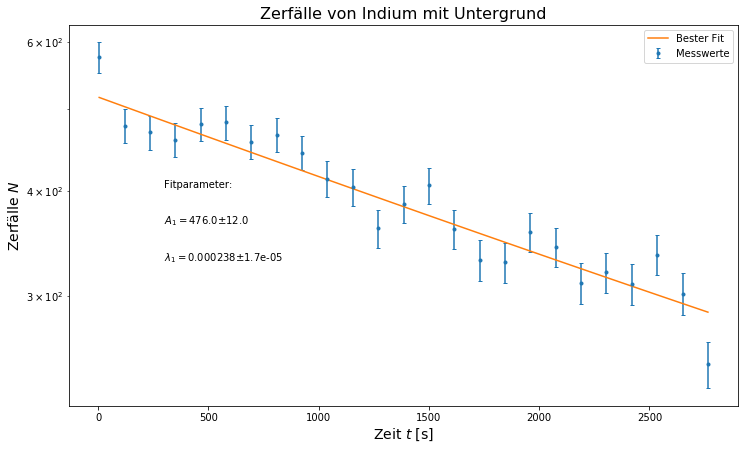

In [8]:
# Bestimmung der Zerfallskonstante
N_In = np.loadtxt('data/252/IndiumAJ.dat', usecols = [1])
sig_N_In = np.sqrt(N_In)
t_In = np.arange(5, 2800, 115)



# Fit
y0 = mean_unterg_In
def expo(x, A1, l1):
    return A1 * exp(-l1 * x) + y0

popt, pcov = curve_fit(expo, t_In[1:], N_In[1:], sigma = sig_N_In[1:], 
                       p0 = [600, 0.002])

# Fitparameter
A_In = popt[0]
sig_A_In = pcov[0,0]
l_In = popt[1]
sig_l_In = pcov[1,1]

# Plot
plt.figure(figsize = (12,7))
# Messungen
plt.errorbar(t_In, N_In, yerr = sig_N_In, fmt = '.', capsize = 2, 
             label = 'Messwerte')
plt.xlabel('Zeit $t$ [s]', size = 14)
plt.ylabel('Zerfälle $N$', size = 14)
plt.title('Zerfälle von Indium mit Untergrund', size = 16)
plt.yscale('log')

# Fit
plt.plot(t_In, expo(t_In, *popt), label = 'Bester Fit') 
plt.text(300, exp(6), 'Fitparameter:')
plt.text(300, exp(5.9), '$A_1 = $' + str(np.round(A_In,0)) + '$\pm$' 
         + str(np.round(sqrt(sig_A_In),0)))
plt.text(300, exp(5.8), '$\\lambda_1 = $' + str(np.round(l_In, 6)) + '$\pm$' 
         + str(np.round(sqrt(sig_l_In),6)))

plt.legend(loc = 'best')
plt.savefig('images/252/V252Diagramm3.png')
plt.show()

In [9]:
# Güte des Fits
chi2_= np.sum((expo(t_In, *popt) - N_In) ** 2 / sig_N_In ** 2) 
dof = len(N_In) - 2 #dof:degrees of freedom, Freiheitsgrad 
chi2_red = chi2_/dof

print("chi2 =", chi2_)
print("chi2_red =",chi2_red)

prob = np.round(1 - chi2.cdf(chi2_,dof),2) * 100 
print("Wahrscheinlichkeit =", prob, "%")

chi2 = 34.7570978870017
chi2_red = 1.5111781690000738
Wahrscheinlichkeit = 5.0 %


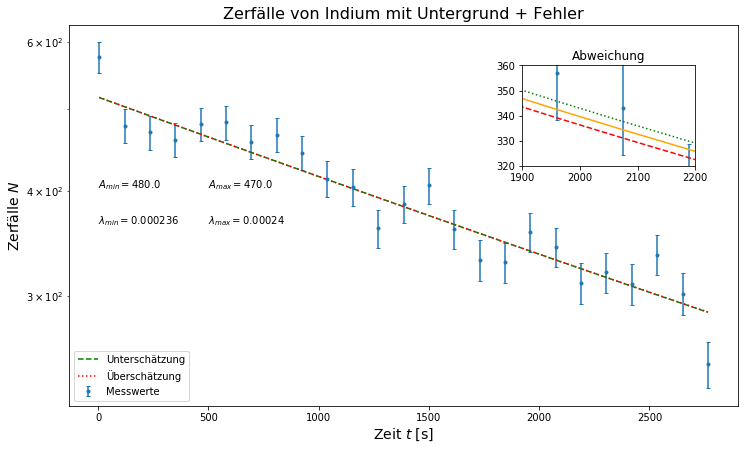

In [10]:
# Fit unter Berücksichtigung des Untergrund-Fehlers

# Fit unterschätzt
y0 = mean_unterg_In - sig_mean_unterg_In 
popt_min, pcov_min = curve_fit(expo, t_In[1:], N_In[1:], sigma = sig_N_In[1:], 
                               p0 = [600, 0.002])

# Fitparemeter 
A_min_In = popt_min[0]
sig_A_min_In = pcov_min[0,0]
l_min_In = popt_min[1]
sig_l_min_In = pcov_min[1,1]

# Plot
plt.figure(figsize = (12,7))
# Messungen
plt.errorbar(t_In, N_In, yerr = sig_N_In, fmt = '.', capsize = 2, 
             label = 'Messwerte')
plt.xlabel('Zeit $t$ [s]', size = 14)
plt.ylabel('Zerfälle $N$', size = 14)
plt.title('Zerfälle von Indium mit Untergrund + Fehler', size = 16)
plt.yscale('log')

# Plot min
plt.plot(t_In, expo(t_In, *popt_min), label = 'Unterschätzung', ls = '--', 
         color = 'green') 
plt.text(0, exp(6), '$A_{min} = $' + str(np.round(A_min_In,-1)) )
plt.text(0, exp(5.9), '$\\lambda_{min} = $' + str(np.round(l_min_In, 6)) )


# Fit überschätzt
y0 = mean_unterg_In + sig_mean_unterg_In
popt_max, pcov_max = curve_fit(expo, t_In[1:], N_In[1:], sigma = sig_N_In[1:], 
                               p0 = [600, 0.002])

# Fitparameter
A_max_In = popt_max[0]
sig_A_max_In = pcov_max[0,0]
l_max_In = popt_max[1]
sig_l_max_In = pcov_max[1,1]

# Plot max
plt.plot(t_In, expo(t_In, *popt_max), label = 'Überschätzung', ls = 'dotted', 
         color = 'red') 
plt.text(500, exp(6), '$A_{max} = $' + str(np.round(A_max_In,-1)) )
plt.text(500, exp(5.9), '$\\lambda_{max} = $' + str(np.round(l_max_In, 6)) )
plt.legend(loc = 'lower left')

# Kleines Rechteck oben rechts
a = plt.axes([.65, .6, .2, .2], facecolor = 'white')
plt.plot(t_In, expo(t_In, *popt_min), color = 'green', ls = 'dotted')
plt.plot(t_In, expo(t_In, *popt_max), color = 'red', ls = '--')
plt.plot(t_In, expo(t_In, *popt), color = 'orange')
plt.errorbar(t_In, N_In, yerr = sig_N_In, fmt = '.', capsize = 2)
plt.xlim(1900, 2200)
plt.ylim(320, 360)
plt.title('Abweichung')


plt.savefig('images/252/V252Diagramm4.png')
plt.show()

In [11]:
# Differenz der Zerfallskonstanten:
sig_min_l_In = np.abs(l_In - l_min_In)
sig_max_l_In = np.abs(l_In - l_max_In)

f_l_In = sqrt( ((sig_min_l_In + sig_max_l_In) / 2) ** 2 + sig_l_In ** 2 )

print('Zerfallskonstante l_In = ' + str(np.round(l_In,6)) 
      + ' +/- ' + str(np.round(f_l_In,6))) # s^-1
print('Halbwertszeit T_12 = ' + str(np.round( log(2) / l_In, 0))
     + ' +/- ' + str(np.round(log(2) * f_l_In / (l_In ** 2),0)))
print('Lebensdauer tau = ' + str(np.round( 1 / l_In, 0))
     + ' +/- ' + str(np.round(1 * f_l_In / (l_In ** 2),0)))

Zerfallskonstante l_In = 0.000238 +/- 2e-06
Halbwertszeit T_12 = 2915.0 +/- 28.0
Lebensdauer tau = 4205.0 +/- 40.0
